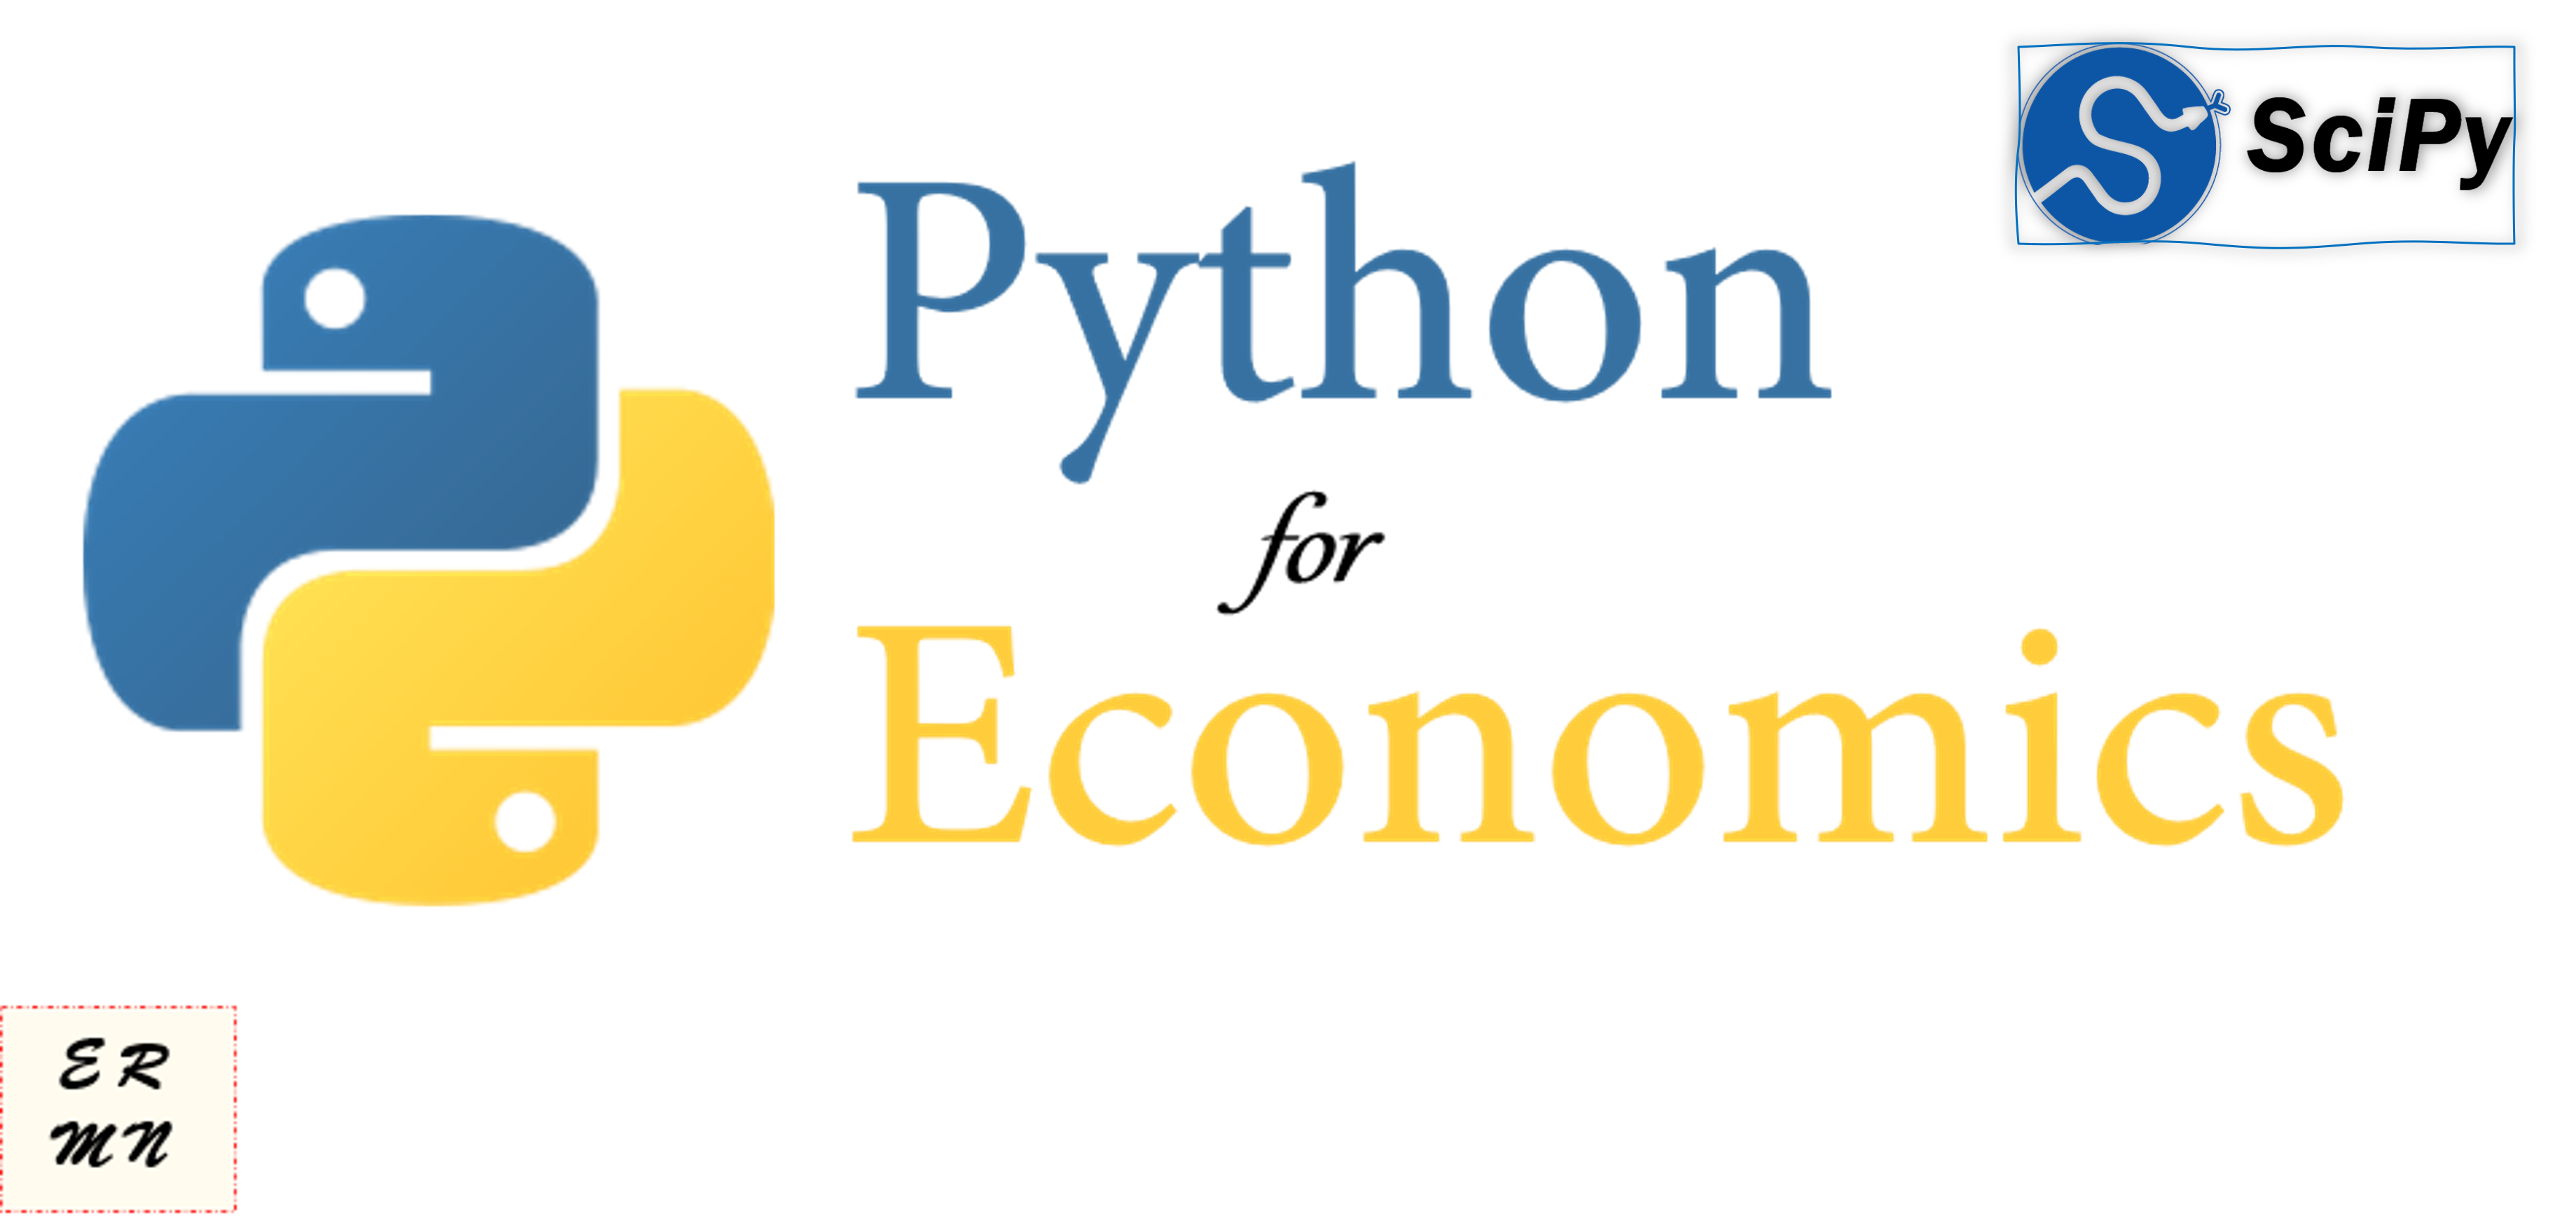

In [1]:
import scipy.optimize as spo                # The "optimize" module in SciPy library is used
import numpy as np                          # for minimization (or maximization) problems

# <font face="gotham" color="purple"> Defining Functions (part II)

In [2]:
def func1(x):
    return x[0]+x[1]

func2 = lambda x: x[0]+x[1]

In [3]:
display(func1([10,5]),func2([10,5]))

15

15

In [4]:
def func3(x,y):
    return x*y

func4= lambda x,y: x*y

In [5]:
display(func3(10,5),func4(10,5))

50

50

# <font face="gotham" color="navy">Problem 1:
### $$ min\Big\{f_1(x)=(x-4)^2+3\Big\} $$

In [6]:
def f1(x):
    return (x-4)**2+3

In [7]:
spo.minimize(f1,0)

      fun: 3.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.99999999])

# <font face="gotham" color="tomato"> Output Definitions
>* <b>fun</b> - The approximate value of y
>* <b> hess_inv </b> - Approximation of the Hessian inverse
>* <b>jac</b> - Jacobian
>* <b> message </b> - Description of the cause of the termination
>* <b> nfev, njev</b> - No. of evaluations of the objective functions and its jacobian
>* <b> nit </b> - No. of iterations
>* <b> status, success </b> - Termination and exit status
>* <b> x </b> - The approximate value of x (<u>solution</u>)

# <font face="gotham" color="navy">Problem 2:
### $$ min\Big\{f_2(x_1,x_2)=(x_1-1)^2+(x_2-2.5)^2\Big\} $$

In [8]:
def f2(x):
    return (x[0]-1)**2+(x[1]-2.5)**2

In [9]:
f2mi=spo.minimize(f2,[1,1],options={'disp':True})     # The 'options={'disp':True}' evaluates the 'fun' value by
display(f2mi)                                         # iterating the 'x' value(s).

display(f2mi.x)
display(f2mi.fun)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3


      fun: 6.049591724905499e-16
 hess_inv: array([[ 1.00000000e+00, -7.37681242e-09],
       [-7.37681242e-09,  4.99999996e-01]])
      jac: array([-2.93597133e-08, -6.56536336e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999998, 2.49999999])

array([0.99999998, 2.49999999])

6.049591724905499e-16

# <font face="gotham" color="navy">Problem 3:
### $$ min\Big\{f_3(x_1,x_2,x_3) = sin(x_1+x_2+x_3) + sin(x_1) + sin(x_2)+sin(x_3)\Big\} $$

In [10]:
def f3(x):
    return np.sin(x[0]+x[1]+x[2])+np.sin(x[0])+np.sin(x[1])+np.sin(x[2])

In [11]:
f3mi=spo.minimize(f3,[0,0,0], options={'disp':True})
display(f3mi)          # It does NOT return the GENERAL SOLUTION

Optimization terminated successfully.
         Current function value: -2.828427
         Iterations: 6
         Function evaluations: 28
         Gradient evaluations: 7


      fun: -2.828427124746187
 hess_inv: array([[ 0.78436506, -0.2156352 , -0.21563802],
       [-0.2156352 ,  0.78436455, -0.21563828],
       [-0.21563802, -0.21563828,  0.78435889]])
      jac: array([-5.96046448e-08, -5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-0.78539819, -0.78539819, -0.78539819])

# <font face="gotham" color="purple"> Mathematical Programming

# <font face="gotham" color="navy">Problem 4:
### $$ min\Big\{f_4(x_1,x_2,x_3,x_4)=(x_1+1)(x_2+1)(x_3+1)(x_4+1)\Big\} $$ 
$$ s.t. \begin{cases} x_1x_2x_3x_4=1 \\ \{x_1,x_2,x_3,x_4\}\geq 0 \end{cases}  $$

In [12]:
def f4(x):
    return (x[0]+1)*(x[1]+1)*(x[2]+1)*(x[3]+1)

cons4=({'type':'eq','fun': lambda x: x[0]*x[1]*x[2]*x[3]-1})     # Adding constraint

b4=((0,None),(0,None),(0,None),(0,None))

In [13]:
f4mi=spo.minimize(f4,[1,1,1,1], options={'disp':True}, bounds=b4 , constraints=cons4)
display(f4mi)

x4mi=f4mi.x
display(x4mi)

y4mi=f4mi.fun
display(y4mi)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.0
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


     fun: 16.0
     jac: array([8., 8., 8., 8.])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 1., 1., 1.])

array([1., 1., 1., 1.])

16.0

# <font face="gotham" color="navy">Problem 5:
### $$ min\Big\{f_5(x_1,x_2,x_3,x_4)=x_1x_4(x_1+x_2+x_3)+x_3\Big\} $$ 
$$ s.t. \begin{cases} x_1x_2x_3x_4 \geq 25 \\ \sum_{i=1}^{4} x_i^{2} = 40 \\ 1 \leq \{x_1,x_2,x_3,x_4\} \leq 5 \end{cases}  $$

In [14]:
def f5(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def con51(x):
    return x[0]**2+x[1]**2+x[2]**2+x[3]**2-40

def con52(x):
    return x[0]*x[1]*x[2]*x[3]-25     # The SciPy library ALWAYS assumes the 'greater than or equal' sign  
                                      # (≥) for implicit inequalities; here meaning: x[0]*x[1]*x[2]*x[3]-25.0 ≥ 0

cons5=({'type':'eq','fun': con51},{'type':'ineq','fun':con52})

b5=([1,5],[1,5],[1,5],[1,5])     # This is the bound

In [15]:
f5mi=spo.minimize(f5,[4,2,1,3],options={'disp':True},bounds=b5,constraints=cons5)
display(f5mi)

display(f5mi.x,f5mi.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.014017288901023
            Iterations: 17
            Function evaluations: 87
            Gradient evaluations: 17


     fun: 17.014017288901023
     jac: array([14.57227564,  1.37940836,  2.37940836,  9.56414938])
 message: 'Optimization terminated successfully'
    nfev: 87
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.        , 4.74299968, 3.82114993, 1.3794083 ])

array([1.        , 4.74299968, 3.82114993, 1.3794083 ])

17.014017288901023

# <font face="gotham" color="navy">Problem 6:
### $$ max\Big\{f_6(x)=x^3-4x^2+x+2\Big\} $$
$$ s.t. \quad -1\leq x\leq3.5 $$

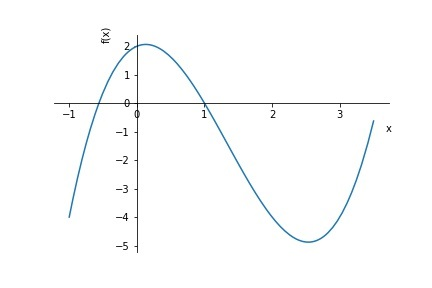

In [16]:
def f6(x):
    A=x**3-4*x**2+x+2
    return -A

# A MINUS sign is added to the function to make the SciPy solve for maximum

b6=[(-1,3.5)]

In [17]:
f6ma=spo.minimize(f6,0.1,bounds=b6)
display(f6ma)

display(f6ma.x,-f6ma.fun)

      fun: array([-2.06460493])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.4408921e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.13148291])

array([0.13148291])

array([2.06460493])

# <font face="gotham" color="navy">Problem 7:
### $$ max\Big\{f_7(x_1,x_2)=x_1x_2\Big\} $$ 
$$ s.t. \quad 2x_1+x_2=100 $$

In [18]:
def f7(x):
    A=x[0]*x[1]
    return -A

cons7=({'type':'eq','fun': lambda x: 2*x[0]+x[1]-100})

In [19]:
f7ma=spo.minimize(f7,[50,0], options={'disp':True}, constraints=cons7)
display(f7ma)

display(f7ma.x,-f7ma.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1250.0
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3


     fun: -1250.0
     jac: array([-50., -25.])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([25., 50.])

array([25., 50.])

1250.0

# <font face="gotham" color="navy">Problem 8:
### $$ max\Big\{f_8(x_1,x_2)=x_1^2+(x_2-3)^2\Big\} $$
$$ s.t. \begin{cases} 5x_1+3x_2 \leq 15 \\ \{x_1,x_2\} \geq 0\end{cases}  $$

In [20]:
def f8(x):
    A=x[0]**2+(x[1]-3)**2
    return -A

cons8=({'type':'ineq','fun': lambda x: 15-5*x[0]-3*x[1]})
b8=((0,None),(0,None))

In [21]:
f8ma=spo.minimize(f8,[6,-5], options={'disp':True},bounds=b8, constraints=cons8)
display(f8ma)

display(f8ma.x,-f8ma.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -18.000000000004125
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


     fun: -18.000000000004125
     jac: array([-6.,  6.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([3., 0.])

array([3., 0.])

18.000000000004125

# <font face="gotham" color="navy">Problem 9:
### $$ max\Big\{f_9(x_1,x_2)=12x_1+8x_2\Big\} $$
$$ s.t. \begin{cases}  5x_1+2x_2\leq 150 \\ 2x_1+3x_2\leq 100 \\ 4x_1+2x_2\leq 80 \\ \{x_1,x_2\} \geq 0\end{cases}  $$

In [22]:
def f9(x):
    A=12*x[0]+8*x[1]
    return -A

cons9=({'type':'ineq','fun': lambda x: 150-5*x[0]-2*x[1]},
       {'type':'ineq','fun': lambda x: 100-2*x[0]-3*x[1]},
       {'type':'ineq','fun': lambda x: 80-4*x[0]-2*x[1]} )

b9=((0,None),(0,None))

In [23]:
f9ma=spo.minimize(f9,[1,1], options={'disp':True},bounds=b9, constraints=cons9)
display(f9ma)

display(f9ma.x,-f9ma.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -300.00000000015586
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5


     fun: -300.00000000015586
     jac: array([-12.,  -8.])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 5., 30.])

array([ 5., 30.])

300.00000000015586

# <font face="gotham" color="navy">Problem 10:
### $$ max\Big\{f_{10}(x_1,x_2)=5x_1+4x_2\Big\} $$ 
$$ s.t. \begin{cases}  6x_1+4x_2\leq 24 \\ x_1+2x_2\leq 6 \\ x_2\leq 2 \\ x_2-x_1 \geq 1  \\ \{x_1,x_2\} \geq 0 \end{cases} $$

In [24]:
def f10(x):
    A=5*x[0]+4*x[1]
    return -A

cons10=({'type':'ineq','fun': lambda x: 24-6*x[0]-4*x[1]},
       {'type':'ineq','fun': lambda x: 6-1*x[0]-2*x[1]},
       {'type':'ineq','fun': lambda x: x[1]-x[0]-1} )

b10=((0,None),(0,2))

In [25]:
f10ma=spo.minimize(f10,[1,1], options={'disp':True},bounds=b10, constraints=cons10)
display(f10ma)

display(f10ma.x,-f10ma.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -13.000000000000213
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


     fun: -13.000000000000213
     jac: array([-5., -4.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1., 2.])

array([1., 2.])

13.000000000000213